# Predicting Car Prices

In this project, I will be predicting car's market price using its attributes by applying machine learning model which is k-nearest neighbors. Afterwards, I will evaluate the model by using RMSE.

The data set I will be working with contains information on various cars. For each car there is information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile).

# Introduction

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [3]:
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-rate,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# Possible Features Selection

In [4]:
# Select only the columns with continuous values
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


# Data Cleaning

In [5]:
# replace ? with np.NaN in normalized-losses
numeric_cars = numeric_cars.replace('?', np.nan)

# convert all values into float type
numeric_cars = numeric_cars.astype('float')
print(numeric_cars.info())
numeric_cars.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB
None


normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

After some cleaning process, I observe normalized-losses have the most missing values with 41 values, 20% of dataset, among columns. Other columns having missing values have only 4 missing values at most.

Because price column is our target column, its missing values must be dropped but for the others I will replace by average values of its column.


In [6]:
# Drop missing values in price
numeric_cars = numeric_cars.dropna(subset=['price'])

# Fill other missing values with mean
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

print(numeric_cars.info())
numeric_cars.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    201 non-null float64
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-null float64
city-mpg             201 non-null float64
highway-mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 23.6 KB
None


normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Rescale Columns

I will rescale the columns to have all values between 0 and 1 by using the formula below.

\begin{equation*}
x' =
\frac{x - min(x)} {max(x) - min(x)}
\end{equation*}

In [7]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price'] # Save the price column for later to put back after rescaling
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col # Put price column back into dataframe

# Univariate Model

First, I will use the default k value (5)

In [8]:
# Write function for implemention of the model and prediction
def knn_train_test(train_col_name, target_col_name, df):
    np.random.seed(1)
    train = df[np.random.rand(len(df)) <= 0.8]
    test = df[np.random.rand(len(df)) > 0.8]
    model = KNeighborsRegressor()
    model.fit(train[[train_col_name]], train[target_col_name])
    prediction = model.predict(test[[train_col_name]])
    mse = mean_squared_error(test[target_col_name], prediction)
    rmse = np.sqrt(mse)
    return rmse

# test the model for each column as univariate and compare rmse
rmse_univariate = {}
train_cols = numeric_cars.columns.drop('price')
for column in train_cols:
    rmse_univariate[column] = knn_train_test(column, 'price', numeric_cars)

# Create a Series object from the dictionary
rmse_univariate_series = pd.Series(rmse_univariate).sort_values()
rmse_univariate_series


curb-weight          2822.286474
width                3080.180379
horsepower           3199.712527
length               3475.460230
highway-mpg          3727.397063
city-mpg             3841.366669
wheel-base           4061.515062
height               4929.622004
compression-rate     5067.116917
normalized-losses    5067.395232
stroke               5513.844998
bore                 5949.149244
peak-rpm             6172.162215
dtype: float64

By using univariate knn model, curb-weigh is the feature which predict the car price the best among other features and peak-rpm is the worst car price predictor. 

Now, I will modify the model (function above) by changing k values (1, 3 ,5, 7 and 9)

In [9]:
# Modify the function such that the k value becomes a variable
def knn_train_test(train_col_name, target_col_name, df, k):
    np.random.seed(1)
    train = df[np.random.rand(len(df)) <= 0.8]
    test = df[np.random.rand(len(df)) > 0.8]
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(train[[train_col_name]], train[target_col_name])
    prediction = model.predict(test[[train_col_name]])
    mse = mean_squared_error(test[target_col_name], prediction)
    rmse = np.sqrt(mse)
    return rmse

# test the model for each column as univariate and compare rmse
train_cols = numeric_cars.columns.drop('price')
rmse_univariate_k = pd.DataFrame()
for k in range(1,10,2):
    for column in train_cols:
        rmse_univariate_k.loc[k,column] = knn_train_test(column, 'price', numeric_cars, k)
rmse_univariate_k

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
1,5157.780028,1944.781873,1820.402312,2479.113874,5510.995492,2205.980090,10259.930959,5823.542309,6186.707530,3677.207419,7478.565454,5837.095743,4561.458005
3,5029.571224,2886.250547,3184.798447,2251.561638,4622.477702,2350.805936,5990.808093,5646.961930,4999.264939,3237.573267,6203.203660,4295.718874,4347.072868
5,5067.395232,4061.515062,3475.460230,3080.180379,4929.622004,2822.286474,5949.149244,5513.844998,5067.116917,3199.712527,6172.162215,3841.366669,3727.397063
7,5443.800704,3767.547352,3935.804481,3319.935329,4961.375746,2986.631520,6699.228682,5542.464535,4803.839707,3419.384343,6391.520037,3847.606007,3545.884865
9,5604.930801,3704.731940,3779.325482,3214.004423,4937.220685,3067.236676,6687.531716,5607.217204,5048.900397,3689.319979,6223.015179,4215.375363,3638.025172


Text(0, 0.5, 'RMSE')

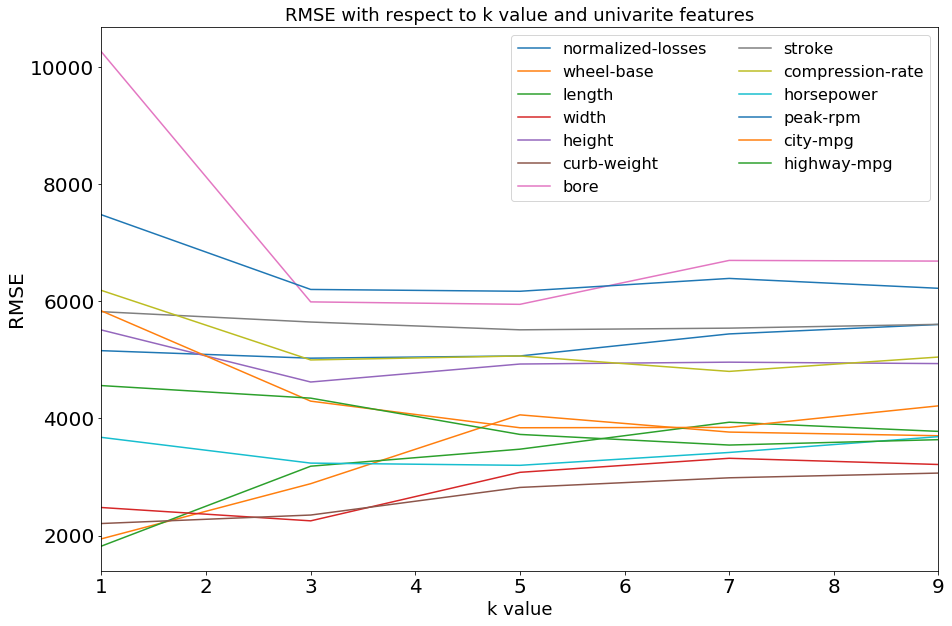

In [10]:
# Visualize RMSE values based on k value and univariate features
rmse_univariate_k.plot(kind='line', figsize=(15,10), fontsize=20)
plt.legend(loc='upper right', fontsize=16, ncol=2)
plt.title('RMSE with respect to k value and univarite features', fontsize=18)
plt.xlabel('k value', fontsize=18)
plt.ylabel('RMSE', fontsize=20)

Changing k values between 1 and 9 denotes how the predicion model can be better. For example, one can easily observe that the best prediction is made when k=1 and feature='length'.

# Multivariate Model

First, I will use the default k value (5)

In [11]:
# Modify the function such that it uses multivariate model
def knn_train_test(train_col_names, target_col_name, df):
    np.random.seed(1)
    train = df[np.random.rand(len(df)) <= 0.8]
    test = df[np.random.rand(len(df)) > 0.8]
    model = KNeighborsRegressor()
    model.fit(train[train_col_names], train[target_col_name])
    prediction = model.predict(test[train_col_names])
    mse = mean_squared_error(test[target_col_name], prediction)
    rmse = np.sqrt(mse)
    return rmse

# test the model for the best of 2, 3, 4 and 5 rmse from multivariate model
rmse_multivariate = {}
for i in range(2,6):
    features = rmse_univariate_series.iloc[:i].index
    name = 'rmse_multivariate_' + str(i)
    rmse_multivariate[name] = knn_train_test(features, 'price', numeric_cars)
rmse_multivariate


{'rmse_multivariate_2': 2359.10633380995,
 'rmse_multivariate_3': 2137.9651403456824,
 'rmse_multivariate_4': 2032.655906170272,
 'rmse_multivariate_5': 2163.7475204941184}

Comparing univariate model with default k value with multivariate model with default k value, multivarite model (best rmse = 2032) predicts better than univariate model (best rmse = 2822).

Among multivariate models, the model with four features is the best predictor of car price.

Now, I will vary the k value between 1 and 25 for the previous best three model.

In [12]:
# Modify the function such that it uses the best three multivariate models varying the hyperparamter between 1 and 25
def knn_train_test(train_col_names, target_col_name, df, k):
    np.random.seed(1)
    train = df[np.random.rand(len(df)) <= 0.8]
    test = df[np.random.rand(len(df)) > 0.8]
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(train[train_col_names], train[target_col_name])
    prediction = model.predict(test[train_col_names])
    mse = mean_squared_error(test[target_col_name], prediction)
    rmse = np.sqrt(mse)
    return rmse

# test the model for each column as multivariate and compare rmse
rmse_multivariate_k = pd.DataFrame()
for i in range(3,6):
    features = rmse_univariate_series.iloc[:i].index
    for k in range(1,26):
        col = str(i) + '_best_features'
        col = col.replace('_', ' ')
        rmse_multivariate_k.loc[k,col] = knn_train_test(features, 'price', numeric_cars, k)
rmse_multivariate_k

,3 best features,4 best features,5 best features
1,1838.977028,1757.334332,1432.679564
2,1873.179221,1711.527917,1863.087224
3,1882.388011,1936.418801,1838.155992
4,1979.540193,2025.953365,2052.781390
5,2137.965140,2032.655906,2163.747520
6,2183.262538,2236.853434,2247.301866
7,2264.353473,2407.920212,2343.196617
8,2273.499992,2502.696424,2422.730006
9,2277.907519,2534.007412,2515.907899
10,2411.189108,2537.415771,2561.050831


([<matplotlib.axis.XTick at 0x1a2433e1d0>,
 <a list of 13 Text xticklabel objects>)

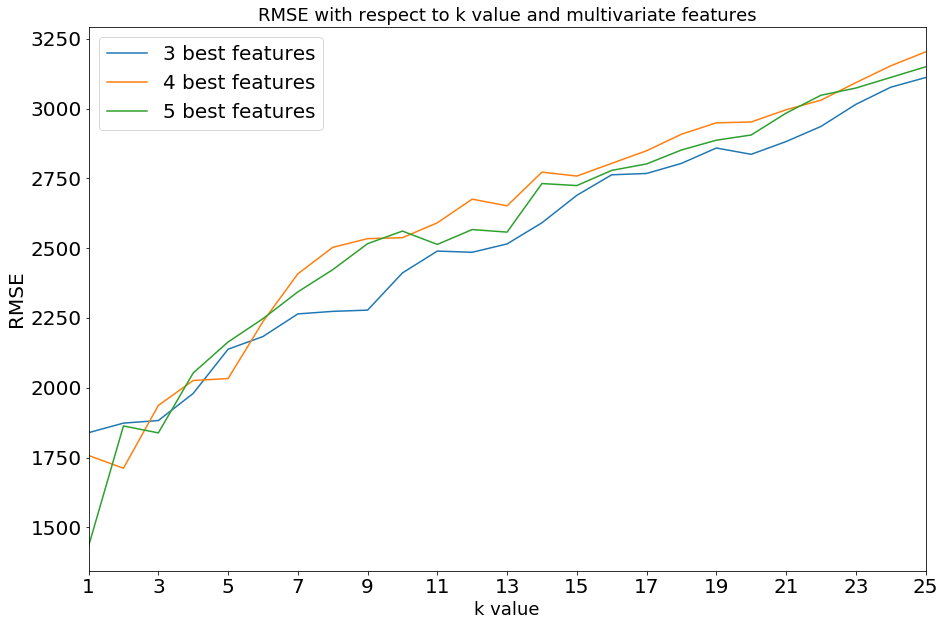

In [13]:
# Visualize RMSE values based on k value and multivariate features
rmse_multivariate_k.plot(kind='line', figsize=(15,10), fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.title('RMSE with respect to k value and multivariate features', fontsize=18)
plt.xlabel('k value', fontsize=18)
plt.ylabel('RMSE', fontsize=20)
plt.xticks(range(1,26,2))

There is a trend such that as k value increases rmse increses for each model. The best predictor of car price is the model with 5 best features with k=1 having rmse 1432.